In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas as pd
import random

In [1]:
1 + 1

2

библиотеки

In [3]:
data = pd.read_csv('statick//train.csv')
data = data[['sc_h','sc_w']].copy()
mass = data.to_numpy()

In [4]:
mas = []
for i in mass:
    mas.append([i[0], i[1]])
mass = mas

In [11]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

for i in mass:
    ax.scatter(i[0], i[1] , color='b')


ax.grid()
plt.show()

визуализируем наши точки

In [34]:
mass_collor = ['#000000', '#808080', '#FF00FF', '#32CD32', '#800000',
               '#FFFF00', '#808000', '#00FF00', '#008000', '#0000FF']

задаём количество групп

Schedule number 1


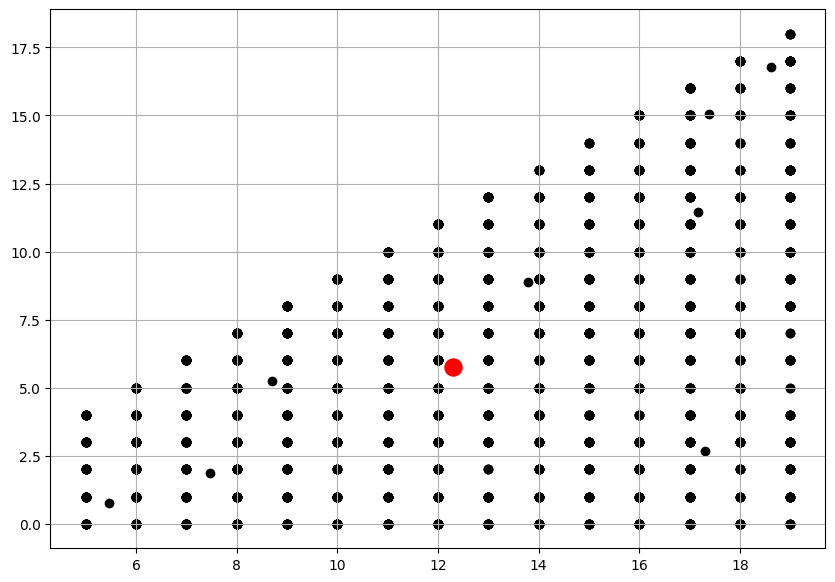

Schedule number 2


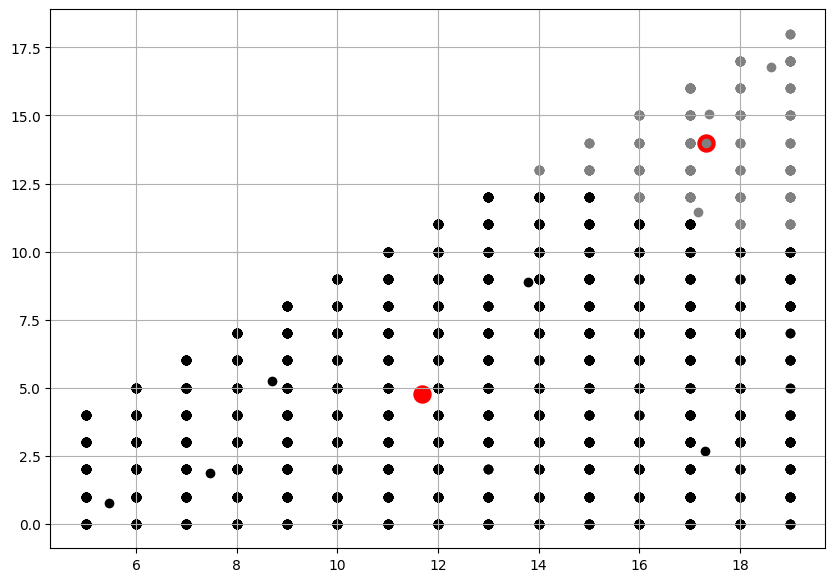

Schedule number 3


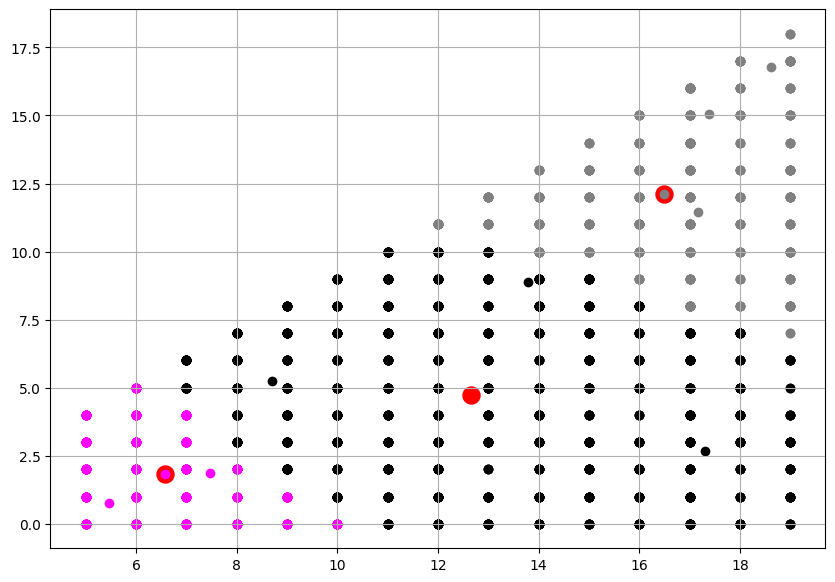

Schedule number 4


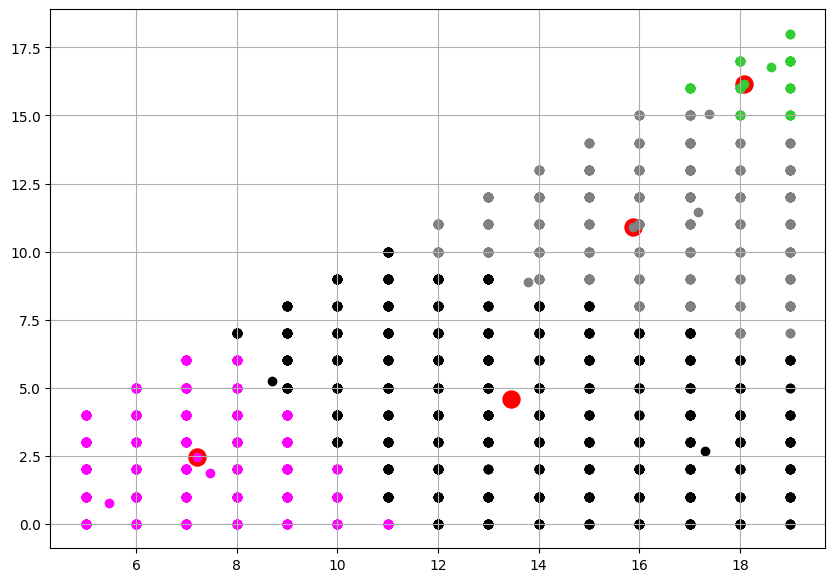

Schedule number 5


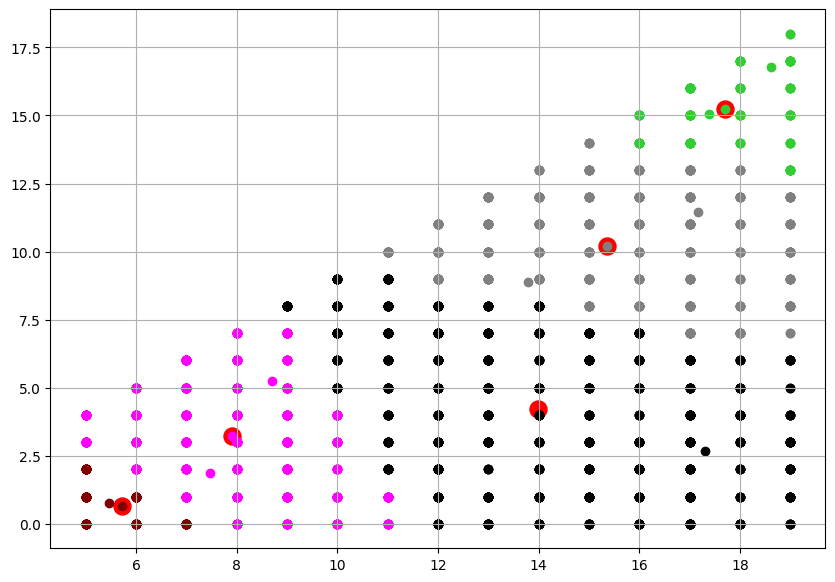

Schedule number 6


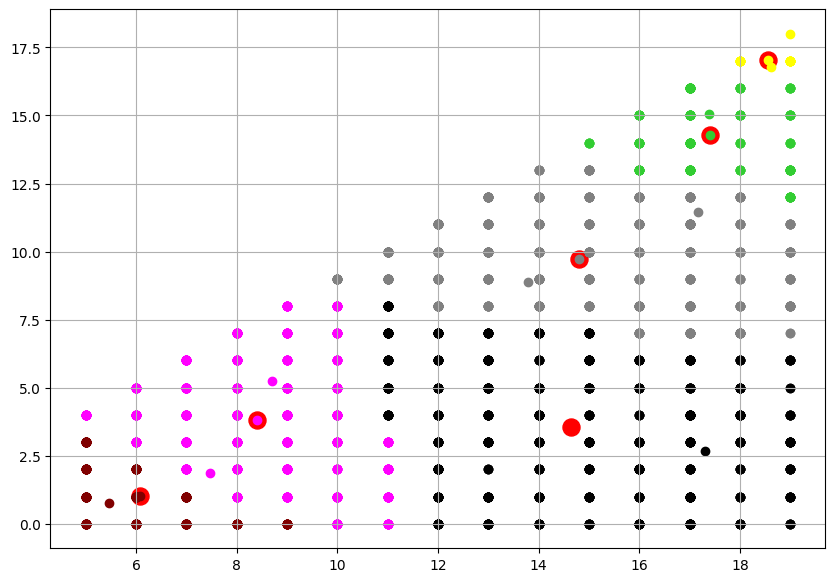

Schedule number 7


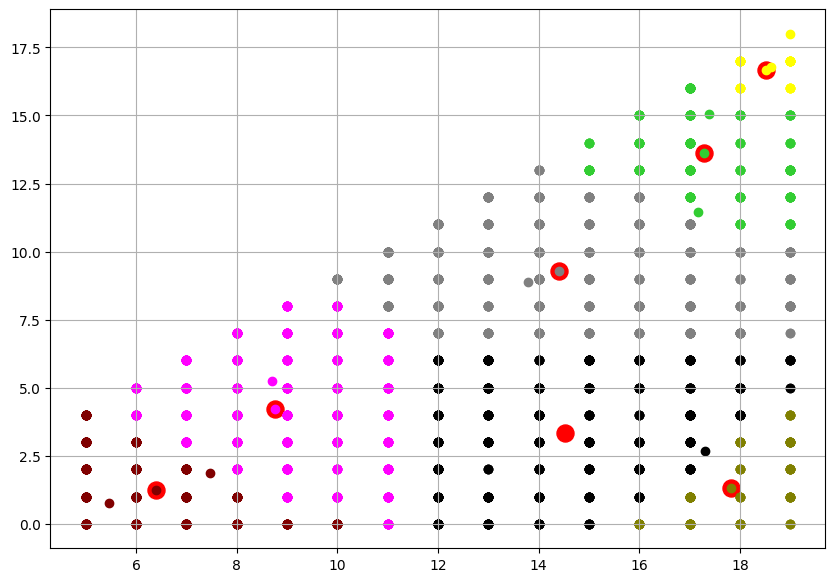

Schedule number 8


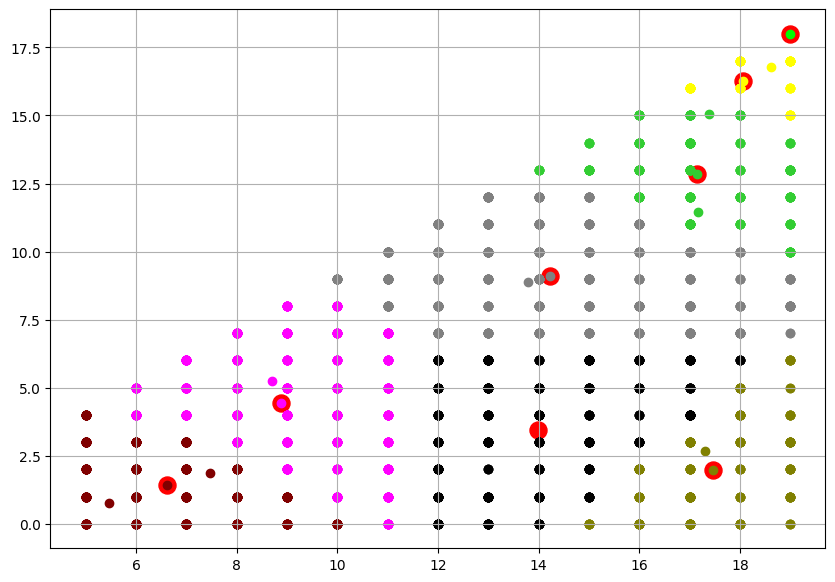

Schedule number 9


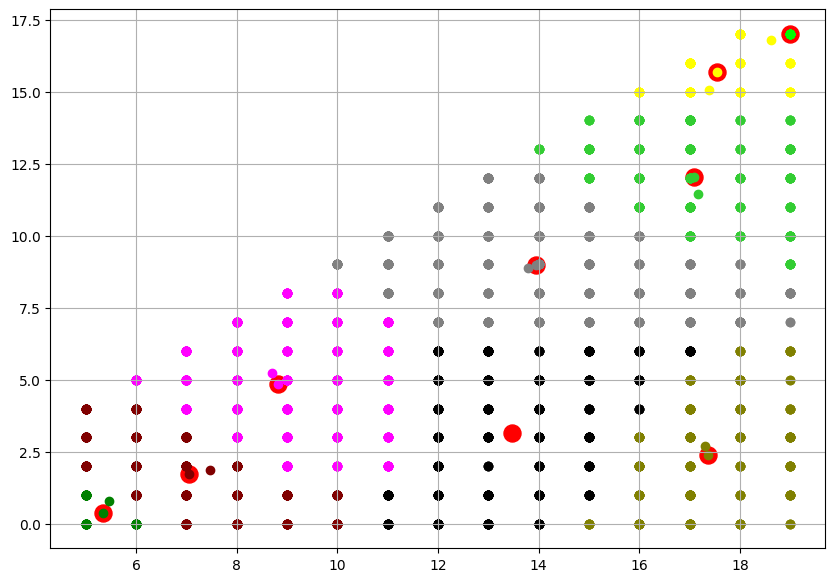

Schedule number 10


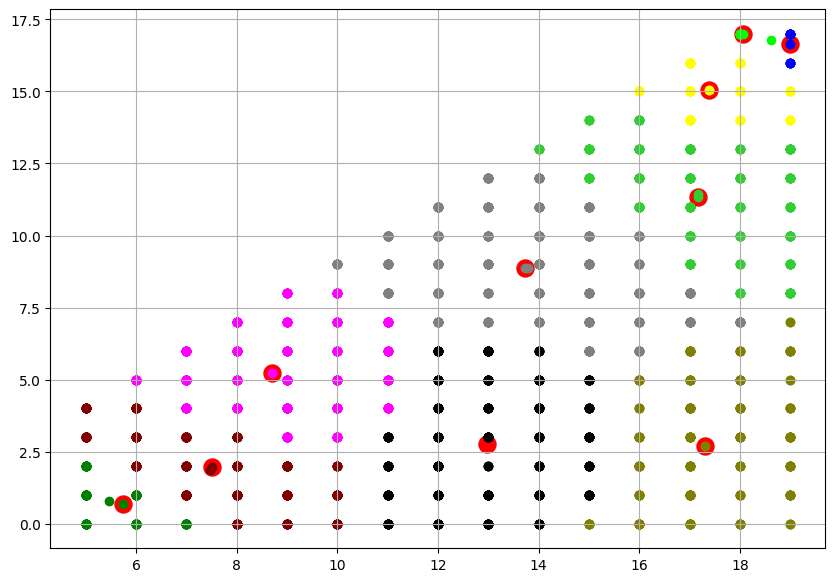

In [30]:
min = 1
max = 11
mass_elbow_value = []
# задаём начальную точку
cluster_centers = [[round(random.uniform(0.0, 10.0), 2), round(random.uniform(0.0, 10.0), 2)]] 
# цикл для определения коилчество кластеров "методом локтя"
for k in range(min, max):
    # для создания точки для определения нового кластера кластера
    if k != 1:
        # считаем евклидово расстояние до каждых точек относительно центра кластера 
        new_mass_point_to_claster = []
        for i in mass:
            new_euclidean_distances = [] 
            for j in cluster_centers:
                new_euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
            new_mass_point_to_claster.append(new_euclidean_distances)
        maximum = [-1, -1]
        # выбираем самую дальнюю точку
        for i in range(len(new_mass_point_to_claster)):
            long = 0
            for j in new_mass_point_to_claster[i]:
                long += j
            if long > maximum[0] and mass[i] not in cluster_centers:
                maximum = [long, i]
        # добавляем коодинаты новой точки
        cluster_centers.append(mass[maximum[-1]])
    mass_point_to_claster = []
    
    # расчитываем центры кластеров
    for i in mass:
        euclidean_distances = [] 
        for j in cluster_centers:
            euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
        mass_point_to_claster.append(euclidean_distances)
    for i in range(len(mass_point_to_claster)):
        minimum = 999999
        numer = -1
        for j in range(len(mass_point_to_claster[i])):
            if mass_point_to_claster[i][j] < minimum:
                minimum = mass_point_to_claster[i][j]
                numer = j + 1
        mass_point_to_claster[i] = numer
#     определяем центры кластеров  
    for i in range(len(cluster_centers)):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i+1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        cluster_centers[i][0] = x_/count
        cluster_centers[i][1] = y_/count
    
    # рисуем график и раскрашиваем точки
#     fig = plt.figure(figsize=(10,7))
#     ax1 = fig.add_subplot()
    for i in range(k):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i+1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        x_ = x_/count
        y_ = y_/count
        cluster_centers[i][0] = x_
        cluster_centers[i][1] = y_
        ax1.scatter(x_,y_, c='r',s=150)
#     for i in range(len(mass_point_to_claster)):
#         ax1.scatter(mass[i][0],mass[i][1], c=mass_collor[mass_point_to_claster[i]-1])
# #     plt.axis([-1, 11, -1, 11])
#     ax1.grid()
#     print(f'Schedule number {k}')
#     plt.show()
    
    elbow_value = 0
    for i in range(k):
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i+1:
                elbow_value += round(math.sqrt((cluster_centers[i][0]-mass[j][0])**2 +
                                               (cluster_centers[i][1]-mass[j][1])**2), 2)
    mass_elbow_value.append(elbow_value)
    

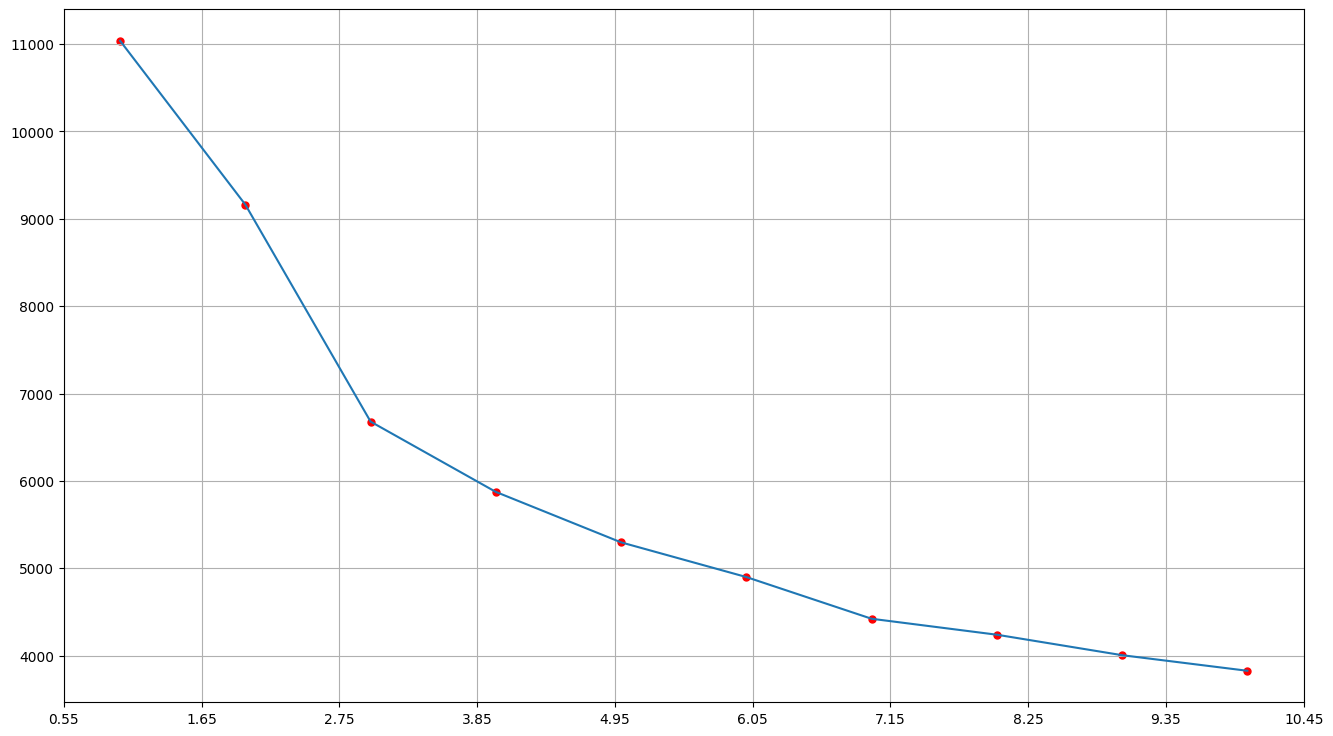

1 кластер = 11038.510000000011
2 кластер = 9162.730000000058
3 кластер = 6678.710000000031
4 кластер = 5873.889999999986
5 кластер = 5296.260000000004
6 кластер = 4899.1799999999885
7 кластер = 4421.640000000019
8 кластер = 4238.960000000002
9 кластер = 4004.5900000000142
10 кластер = 3826.159999999996


In [31]:
import matplotlib.ticker
fig = plt.figure(figsize=(16, 9))
axis = fig.add_subplot()
# plt.axis([1, 10, 0, mass_elbow_value[0]])
axis.grid()
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], mass_elbow_value)
for i in range(len(mass_elbow_value)):
    axis.scatter(i + 1, mass_elbow_value[i], s=25, c='r')
locator = matplotlib.ticker.LinearLocator(10)
axis.xaxis.set_major_locator(locator)
plt.show()
for i in range(len(mass_elbow_value)):
    print(f'{i+1} кластер = {mass_elbow_value[i]}')

In [99]:
k = 3
cluster_centers = [[random.randint(0, 10), random.randint(0,10)]]
for l in range(k-1):
    new_mass_point_to_claster = []
    for i in mass:
        new_euclidean_distances = [] 
        for j in cluster_centers:
            new_euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
        new_mass_point_to_claster.append(new_euclidean_distances)
    maximum = [-1, -1]
    # выбираем самую дальнюю точку
    for i in range(len(new_mass_point_to_claster)):
        long = 0
        for j in new_mass_point_to_claster[i]:
            long += j
        if long > maximum[0] and mass[i] not in cluster_centers:
            maximum = [long, i]
    # добавляем коодинаты новой точки
    cluster_centers.append(mass[maximum[-1]])
cluster_centers[:]

[[1, 6], [19, 18], [19, 0]]

In [100]:
mass_point_to_claster = []
for i in mass:
    euclidean_distances = [] 
    for j in cluster_centers:
        euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
    mass_point_to_claster.append(euclidean_distances)

In [101]:
for i in range(len(mass_point_to_claster)):
    minimum = 999999
    numer = -1
    for j in range(len(mass_point_to_claster[i])):
        if mass_point_to_claster[i][j] < minimum:
            minimum = mass_point_to_claster[i][j]
            numer = j + 1
    mass_point_to_claster[i] = numer
mass_point_to_claster

[1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,


In [102]:
for z in range(4):
    for i in range(k):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i+1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        cluster_centers[i][0] = x_/count
        cluster_centers[i][1] = y_/count
    mass_point_to_claster = []
    for i in mass:
        euclidean_distances = [] 
        for j in cluster_centers:
            euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
        mass_point_to_claster.append(euclidean_distances)
    for i in range(len(mass_point_to_claster)):
        minimum = 999999
        numer = -1
        for j in range(len(mass_point_to_claster[i])):
            if mass_point_to_claster[i][j] < minimum:
                minimum = mass_point_to_claster[i][j]
                numer = j + 1
        mass_point_to_claster[i] = numer

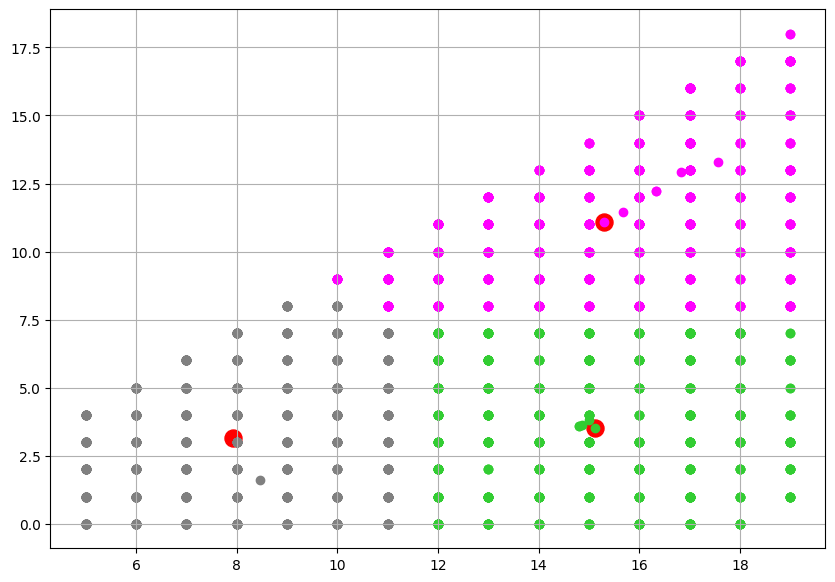

In [103]:
fig = plt.figure(figsize=(10,7), )
ax1 = fig.add_subplot()
# mass_collor = ['y', 'b', 'g']
for i in range(len(cluster_centers)):
    ax1.scatter(cluster_centers[i][0], cluster_centers[i][1], c='r',s=150)

for i in range(len(mass_point_to_claster)):
    ax1.scatter(mass[i][0],mass[i][1], c=mass_collor[mass_point_to_claster[i]])
ax1.grid()
plt.show()